In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Káosz (Chua-áramkörös megvalósítással)

## 1. feladat: Ismerkedés a kapcsolással

A rendszer kontroll paramétere egy változtatható ellenállás. Ennek pillanatnyi nagyságának mérésére használja a `DVM`-et úgy, hogy az `Ell_meres` kapcsolót megfelelő állásba billenti. A viselkedés vizsgálatához ne felejtse visszakapcsolni az ellenállást az áramkörbe.

Kösse be a két csatornás oszcilloszkópot a _Chua-kapcsolás_ két kondenzátorának erősített kimenetére. Vizsgálja meg a jel időfejlődését, nézze meg a szuperponált jel alakját, amit a számítógép segítségével rögzíthet `audacity` használatával, legyen a bemenet `Default: Line: 0`-ra állítva. Amennyiben túlvezérelt a jel a terminálban futtatott `alsamixer`-ben válassza ki a felvételszabályozást _(F4: Capture)_ és a _Capture_ oszlophoz tartozó előerősítést vegye kisebbre a kurzormozgató gombok segítségével.

Az érdekes viselkedési tartományokról lementheti az oszcilloszkóp adatait a `scope.sh 1 2` utasítással, amelynek kimenetét fájlba irányíthatja.

_Figyelmeztetés:_ a mérés során keletkező fájljait ne felejtse a jegyzőkönyv mellé feltölteni!

Azonosítsuk a legfontosabb tartományokat:
* periodikus tartomány,
* periodus kettőződés,
* kaotikus viselkedés,
* _double-scroll_ folyamat.

#### Megoldás:

File-okat ezekről feltöltöttem. Ezeket mind audacity-vel, mind a scope.sh paranccsal felvettem.

Emellett az oszcilloszkóp XY módjában kimértem a bifurkciós pontokhoz tartozó ellenállásértékeket az elliptikus fixpont változásának megfigyelésével.

## 2. feladat: A kapcsolás karakterisztikájának vizsgálata

### 2.1. A lineáris elemek karakterisztikája

Gerjessze impulzussorozattal vagy tapogassa le különböző frekvenciájú $\sin$ jelalakkal a lineáris elemeket. Állapítsa meg a rendszerre jellemző két karakterisztikus időt és a csillapítást.

#### Megoldás:

A csillapítás ideje Audacity-vel mérve $2.125\ s$ volt

### 2.2. A negatív ellenállás karakterisztikája

A nemlineáris elem viselkedése frekvenciafüggetlen. Mérje ki az áram-feszültség karakterisztikát.

## 3. feladat: Az ellenállás mint kontroll paraméter

Ezeket a feladatokat a kontroll paraméter lépésenkénti változtatása mellett kell elvégezni. Az ellenállás méréséhez használja azt a kapcsolót, ami a változtatható ellenállást leválasztja az áramkörről, és a DVM-re kapcsolja. 

### 3.1. Bifurkációs pontok felvétele

Határozza meg a bifurkációs pontokhoz tartozó $R_k$ értékeket! 

Hányad rendig tudja szemmel követni a bifurkációs pontokat?

Mennyire teljesül a Feigenbaum-féle

$$ \lim_{k\rightarrow\infty}\frac{R_k-R_{k-1}}{R_{k+1}-R_k}=\delta\approx 4{,}6692... $$

összefüggés? Miért?

#### Megoldás:

Mért értékek:

$$
R_2 \approx 1.874 \ k \Omega
$$

$$
R_4 \approx 1.863 \ k \Omega
$$

$$
R_8 \approx 1.860 \ k \Omega
$$

Tovább követni szemmel már nem lehetett.

##### Felgenbaum:

In [50]:
R_array = ((1.874, 1.863, 1.860))

In [52]:
print("delta =",(R_array[1] - R_array[0])/(R_array[2] - R_array[1]))

delta = 3.6666666666668393


Az adat azért van messze a Felgenbaum-féle $\delta$-tól, mert közel nem mérhető szemmel elég bifurkációs pont, hogy a limesz közelébe érhessünk velük.

### 3.2. Bifurkációs diagramm felvétele

A kontroll paraméter lépésenkénti változtatása mellett készítsük el a rendszer bifurkációs diagramját. 

* Magyarázza el kvalitatíven miért jelenik meg oszcilláció, miért mozdul ki a rendszer a triviális fixpontjából?
* Mit tapasztal, követi a kaotikus tartományt újabb periodikus szakasz?
* Megjelenik intermittens viselkedés?

A kaotikus állapotban mérjük meg a rendszer Poincaré-leképezésbeli attraktorát! Az ábrát csatolja a jegyzőkönyvhöz!

_Javaslat:_ Hallgassa is meg a különböző tartományokban a keverékjel hangját! Lehet füllel követni a bifurkációs folyamatot?

#### Megoldás:



#### Extra feladat

Mérjük meg a kontroll paraméter függvényében a spektrumot. Határozzuk meg a fő csúcsokat! Hogyan változik ez a kontroll paraméter függvényében?

### 3.3. Az információs entrópia viselkedése

A kontroll paraméter lépésenkénti változtatása mellett, vegyük fel a kimenő jelek/jelkeverék csúcsértékeinek eloszlását, és a $H = -\sum\limits^{4096}_{i=1}p_i\log_2 p_i$ szerinti információs entrópiát.

In [42]:
def Entropy(p_array):
    
    H = 0
    
    for i in range(1,4096):
        
        H += p_array[i-1] * np.log2(p_array[i-1])
        
    return(-H)

In [43]:
#ShannonEntropy = Entropy(p_array)

## 4. feladat: A logisztikus leképezés vizsgálata

Írjon rövid `python` programot, ami adott $r$ kontrollparaméter és $x_0$ kezdeti feltétel mellett meghatározza a logisztikus leképezés első $N$ lépését. A logisztikus leképezés iteratív formulája a következő:
$$x_{n+1} = r x_n (1 - x_n).$$

Ábrázolja a kapott értékek eloszlását a bifurkálódott és a kaotikus tartományban!

In [12]:
import seaborn as sns

In [65]:
def Logistic(N_log, r_ctrl, x_0):
    
    x_nArray = np.empty(N_log)
    
    x_nArray[0] = x_0
    
    for i in range(N_log-1):
        
        x_nArray[i+1] = r_ctrl * x_nArray[i] * (1 - x_nArray[i])
        
    return(x_nArray)

In [94]:
N_log = 50

In [95]:
r_ctrl = 3.5

In [96]:
x_0 = 0.9

In [97]:
LogisticOut = Logistic(N_log, r_ctrl, x_0)

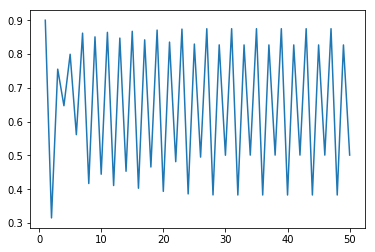

In [98]:
Index_Log = np.linspace(1,N_log,N_log)

plt.plot(Index_Log, LogisticOut)

plt.show()

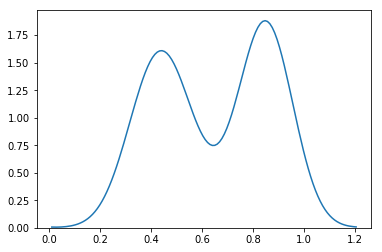

In [99]:
sns.kdeplot(LogisticOut)

plt.show()

## A méréssel kapcsolatos észrevételek

__Kitölteni nem kötelező__: 
* Itt kérjük feltűntetni, hogy mennyi idő volt szükséges a feladatok elvégzéséhez. 
* Itt lehet javaslatot tenni a méréssel kapcsolatban.
* A méréssel kapcsolatban felmerült további ötletek.